# Cubic Spline Interpolation

Aufgabenstellung: Testen ob eine Funktion eine kubische Spline-Interpolierende ist.

 - Gegeben: $n+1$ Punkte.
 - Gesucht: kubische Spline-Interpolierende $S(x)$ für die gegebenen Punkte

In [1]:
# input: given points
points = [
    (-1, 4),
    (1, 3),
    (3, -32),
]
#

In [2]:
points = [vector(p) for p in points]
n = len(points) - 1

Berechnen $a_0$ bis $a_{n+1}$

$$a_i = y_i$$



In [3]:
a = [p[1] for p in points]
show(a)

[4, 3, -32]

Berechnen $h_0$ bis $h_{n}$

$$h_i = x_{i+1} - x_i$$

In [4]:
h = [points[i+1][0] - points[i][0] for i in range(n)]
show(h)

[2, 2]

Anlegen der Matrix $A \in M(n \times n)$

In [5]:
A = matrix([[1] + [0] * (n) ] +\
[[0]*i + [h[i], 2*(h[i] + h[i+1]), h[i+1]] + [0]*(n - 2 - i) for i in range(n-1)] \
+ [ [0] * (n) + [1] ])
show(A)

[1 0 0]
[2 8 2]
[0 0 1]

und des Vektors $\bar{b}$

In [6]:
bv = vector([0] + [(3/h[i+1]*(a[i+2] - a[i+1]))- (3/h[i]*(a[i+1] - a[i])) for i in range(n-1)] + [0])
show(bv)

(0, -51, 0)

In [7]:
show(A^-1)

[   1    0    0]
[-1/4  1/8 -1/4]
[   0    0    1]

Lösung von $A c = \bar{b}$ ergibt $c = \{c_0, c_1, \ldots, c_n\}$

In [8]:
c = (A^-1 * bv)
show(c)

(0, -51/8, 0)

$$b_i = \frac{1}{h_i}(a_{i+1} - a_i) - \frac{h_i}{3}(2 c_i + c_{i+1})$$

In [9]:
b = [1/h[i] * (a[i+1]-a[i]) - h[i]/3*(2*c[i]+c[i+1]) for i in range(n)]
show(b)

[15/4, -9]

$$d_i = \frac{c_{i+1} - c_i}{3 h_i}$$

In [10]:
d = [(c[i+1]-c[i])/(3*h[i]) for i in range(n)]
show(d)

[-17/16, 17/16]

In [11]:
show(LatexExpr('a = '), a)
show(LatexExpr('b = '), b)
show(LatexExpr('c = '), c)
show(LatexExpr('d = '), d)
show(LatexExpr('h = '), h)

a =  [4, 3, -32]

b =  [15/4, -9]

c =  (0, -51/8, 0)

d =  [-17/16, 17/16]

h =  [2, 2]

In [12]:
# all the splines
var('x')
S = [a[i] + b[i]*(x-points[i][0]) + c[i]*(x-points[i][0])^2 + d[i]*(x-points[i][0])^3 
     for i in range(n)]
for i, s in enumerate(S):
    show(LatexExpr("S_{} =".format(i)), s.simplify_full())

S_0 = -17/16*x^3 - 51/16*x^2 + 9/16*x + 107/16

S_1 = 17/16*x^3 - 153/16*x^2 + 111/16*x + 73/16

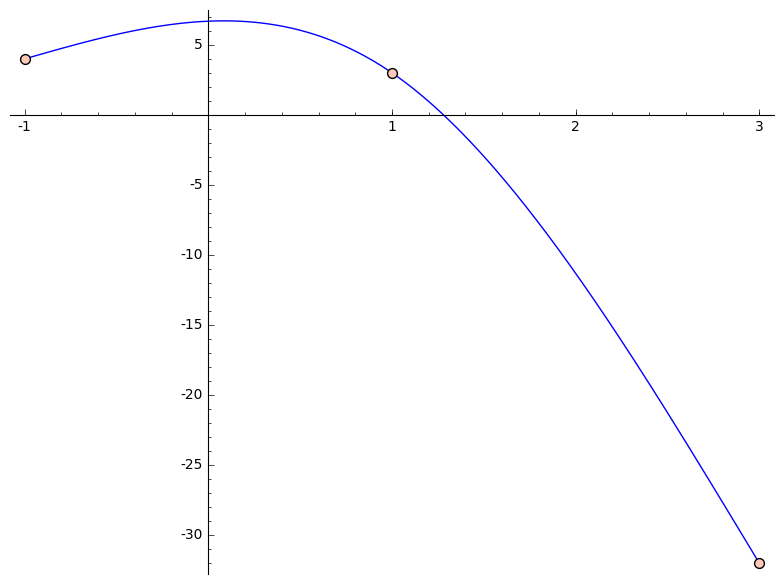

In [13]:
# plot the points and the splines for their interval
scatter_plot(points) + \
sum(plot(s, xmin=points[i][0], xmax=points[i+1][0]) for i, s in enumerate(S))

In [14]:
# Sanity checking
for i in range(len(S)-1):
    if S[i].subs(x=points[i+1][0]) != S[i+1].subs(x=points[i+1][0]):
        print "Spline {} and {} don't match at x = {}".format(i, i+1, points[i+1][0])
    if S[i].derivative().subs(x=points[i+1][0]) != S[i+1].derivative().subs(x=points[i+1][0]):
        print "Derivative of spline {} and {} don't match at x = {}".format(i, i+1, points[i+1][0])
    if S[i].derivative().derivative().subs(x=points[i+1][0]) != S[i+1].derivative().derivative().subs(x=points[i+1][0]):
        print "Second derivative of spline {} and {} don't match at x = {}".format(i, i+1, points[i+1][0])

if S[0].derivative().derivative().subs(x=points[0][0]) != 0:
    print "Second derivative of first spline at first point must be 0"
    
if S[-1].derivative().derivative().subs(x=points[-1][0]) != 0:
    print "Second derivative of last spline at last point must be 0"